In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
for dirname, _, filenames in os.walk('/Users/yongxingnie/Desktop/data science methods and tools/assigment 2/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/yongxingnie/Desktop/data science methods and tools/assigment 2/data/.DS_Store
/Users/yongxingnie/Desktop/data science methods and tools/assigment 2/data/Breast Cancer Wisconsin Dataset.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data='/Users/yongxingnie/Desktop/data science methods and tools/assigment 2/data/Breast Cancer Wisconsin Dataset.csv'
df=pd.DataFrame(pd.read_csv(data))

In [4]:
df.drop(['radius_se', 'texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst','Unnamed: 32'], axis=1, inplace=True)
df.drop(['id'], axis=1, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [5]:
col_names=['diagnosis','radius','texture','perimeter','area','smoothness','compactness','concavity','concave_points'
         ,'symmetry','fractal_dimension']
df.columns=col_names
df.columns

Index(['diagnosis', 'radius', 'texture', 'perimeter', 'area', 'smoothness',
       'compactness', 'concavity', 'concave_points', 'symmetry',
       'fractal_dimension'],
      dtype='object')

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   diagnosis          569 non-null    object 
 1   radius             569 non-null    float64
 2   texture            569 non-null    float64
 3   perimeter          569 non-null    float64
 4   area               569 non-null    float64
 5   smoothness         569 non-null    float64
 6   compactness        569 non-null    float64
 7   concavity          569 non-null    float64
 8   concave_points     569 non-null    float64
 9   symmetry           569 non-null    float64
 10  fractal_dimension  569 non-null    float64
dtypes: float64(10), object(1)
memory usage: 49.0+ KB


In [7]:
df.describe()

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


In [8]:
df['diagnosis']=df['diagnosis'].map({'B':0,'M':1})

df.head()

,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


<AxesSubplot:title={'center':'Heatmap showing Correlation between all the features'}>

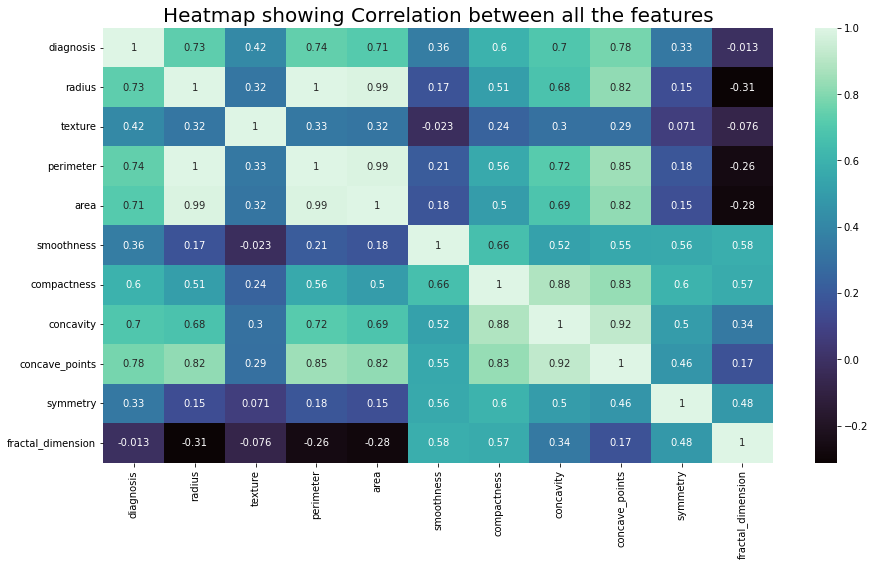

In [9]:
plt.figure(figsize=(15,8))
plt.title("Heatmap showing Correlation between all the features", fontsize=20)
sns.heatmap(df.corr(),annot = True, cmap='mako')

In [10]:
zero_class = df[df.diagnosis==0]
zero_class.shape

(357, 11)

In [11]:
one_class = df[df.diagnosis==1]
one_class.shape

(212, 11)

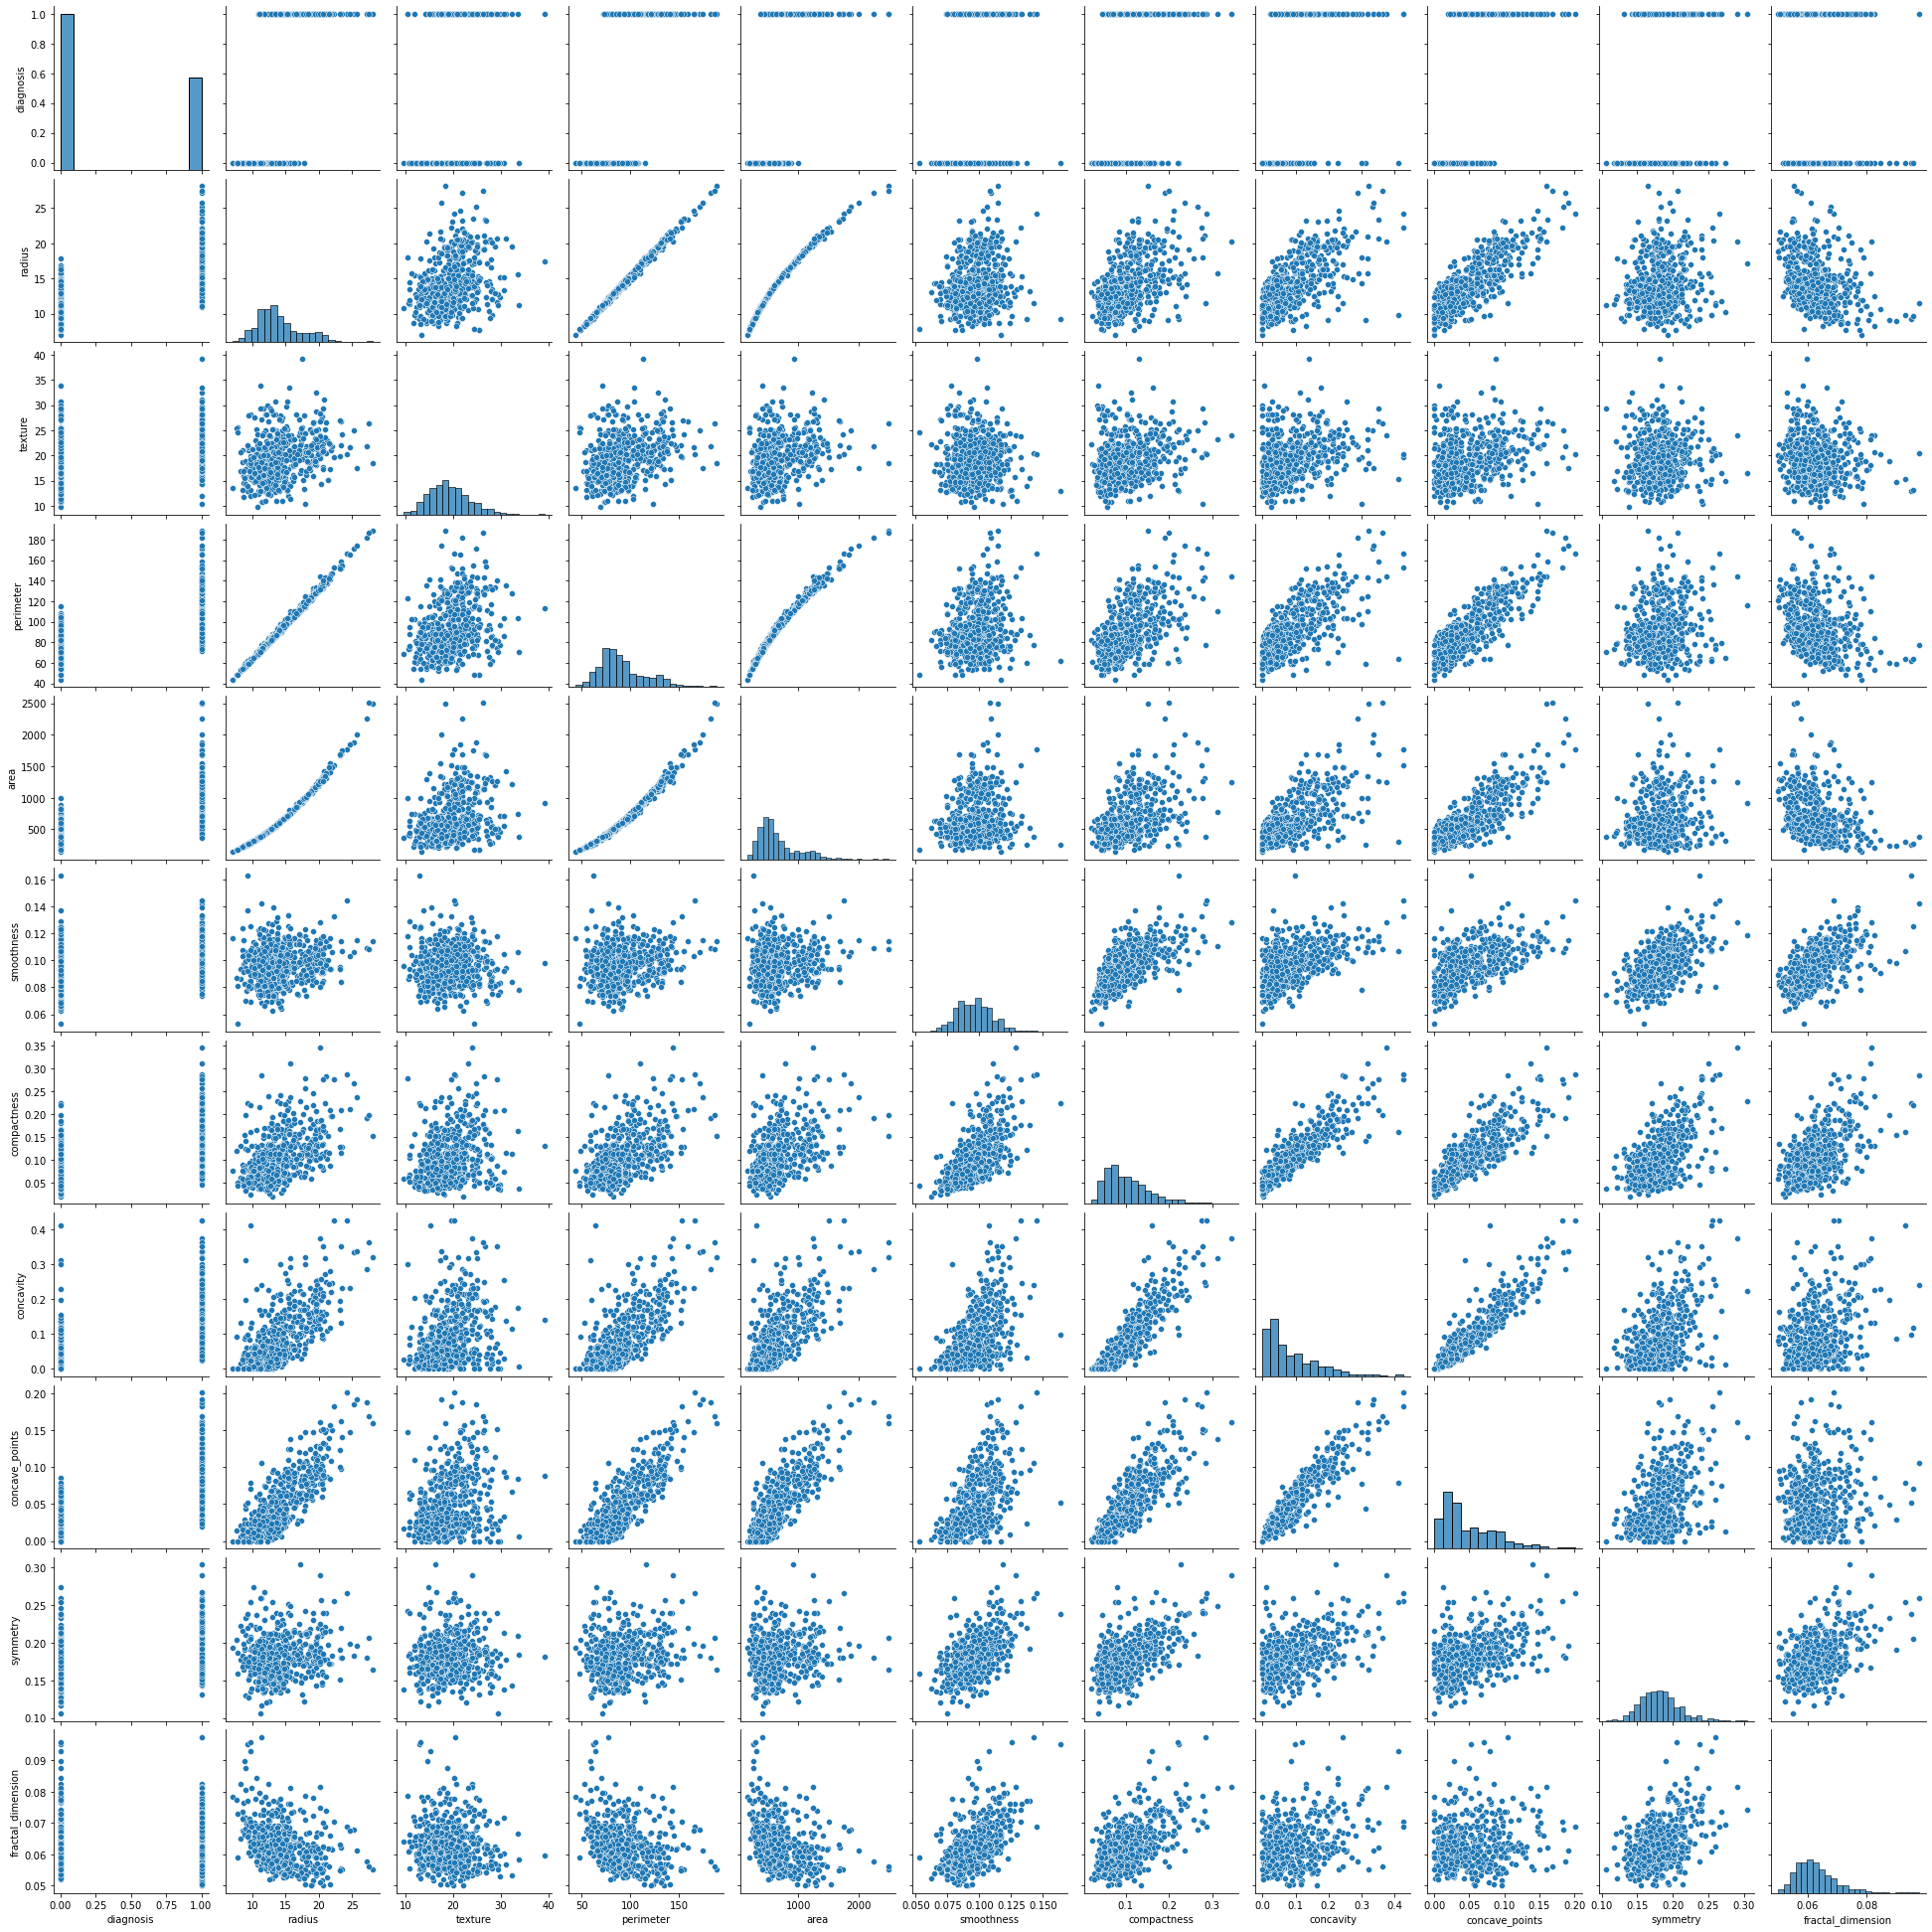

In [12]:
sns.pairplot(df)
plt.show()

In [17]:
y = df.diagnosis
df = df.drop('diagnosis',axis=1)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit(df).transform(df)
df_scaled = pd.DataFrame(scaled, columns=df.columns[:])
df_scaled.head()

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450


In [19]:
X=df

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc=SVC() 
svc.fit(X_train, y_train)
y_pred=svc.predict(X_test)
print('Model accuracy : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy : 0.877


<AxesSubplot:>

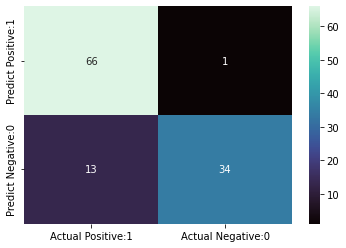

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.90        67
           1       0.97      0.72      0.83        47

    accuracy                           0.88       114
   macro avg       0.90      0.85      0.87       114
weighted avg       0.89      0.88      0.87       114



In [24]:
linear_classifier=SVC(kernel='linear').fit(X_train,y_train)
y_pred = linear_classifier.predict(X_test)
print('Model accuracy with linear kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy with linear kernel : 0.912


<AxesSubplot:>

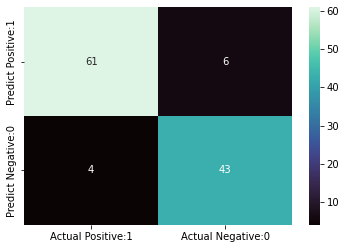

In [25]:
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92        67
           1       0.88      0.91      0.90        47

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



In [27]:
rbf_svc=SVC(kernel='rbf').fit(X_train,y_train)
y_pred = rbf_svc.predict(X_test)
print('Model accuracy with rbf kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy with rbf kernel : 0.877


<AxesSubplot:>

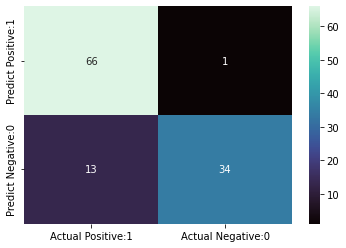

In [28]:
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.90        67
           1       0.97      0.72      0.83        47

    accuracy                           0.88       114
   macro avg       0.90      0.85      0.87       114
weighted avg       0.89      0.88      0.87       114



In [30]:
Poly_svc=SVC(kernel='poly', C=1).fit(X_train,y_train)
y_pred = Poly_svc.predict(X_test)
print('Model accuracy with poly kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy with rbf kernel : 0.886


<AxesSubplot:>

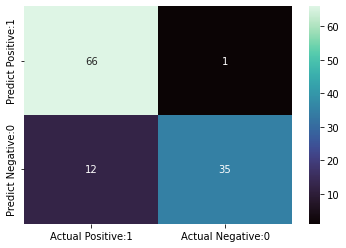

In [31]:
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91        67
           1       0.97      0.74      0.84        47

    accuracy                           0.89       114
   macro avg       0.91      0.86      0.88       114
weighted avg       0.90      0.89      0.88       114



In [34]:
Poly_svc=SVC(kernel='sigmoid', C=1).fit(X_train,y_train)
y_pred = Poly_svc.predict(X_test)
print('Model accuracy with sigmoid kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy with rbf kernel : 0.404


<AxesSubplot:>

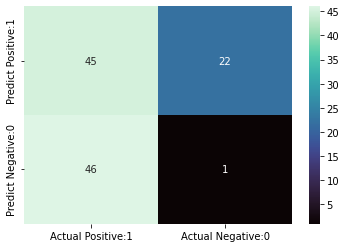

In [35]:
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.49      0.67      0.57        67
           1       0.04      0.02      0.03        47

    accuracy                           0.40       114
   macro avg       0.27      0.35      0.30       114
weighted avg       0.31      0.40      0.35       114

